## Lazada Cross-Border E-Commerce Promotion Analysis

In [3]:
### Required Python Libraries
! pip install pandas numpy matplotlib seaborn scikit-learn plotly dash jupyter
! pip install xgboost lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
! pip install dash
import dash
from dash import dcc, html, Input, Output, callback
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.1 MB/s eta 0:00:00


## Data Understanding and Quality Verification

Initializing LazadaDataAnalyzer...
Dataset loaded successfully! Shape: (3586, 14)

DATA OVERVIEW
Dataset Overview:
Rows: 3586, Columns: 14

First 5 rows:
       itemId                                               name brandName  \
0   342230105  Original Xiaomi Redmi Note 9 Pro 5G 2 SIM 8/12...    Xiaomi   
1   464752465  Xiaomi Redmi 13C Ram 8GB/ 256GB new Fullbox 2 ...    Xiaomi   
2   709428868  Xiaomi Redmi 9A 2GB/32GB Phone - Huge 5000 mah...    Xiaomi   
3   895822931   Xiaomi Redmi 9A 2GB/32GB Phone - Genuine Product    Xiaomi   
4  1205582653  Phone Xiaomi Redmi Note 13 (6GB/128GB | 8GB/12...    Xiaomi   

         category  originalPrice  priceShow  itemSoldCntShow  discount  \
0  Cellular phone        3590000    3466863               72         3   
1  Cellular phone        5200000    2850000                5        45   
2  Cellular phone        2690000    1757000              288        35   
3  Cellular phone        2690000    1849000               52        31   
4  Cell

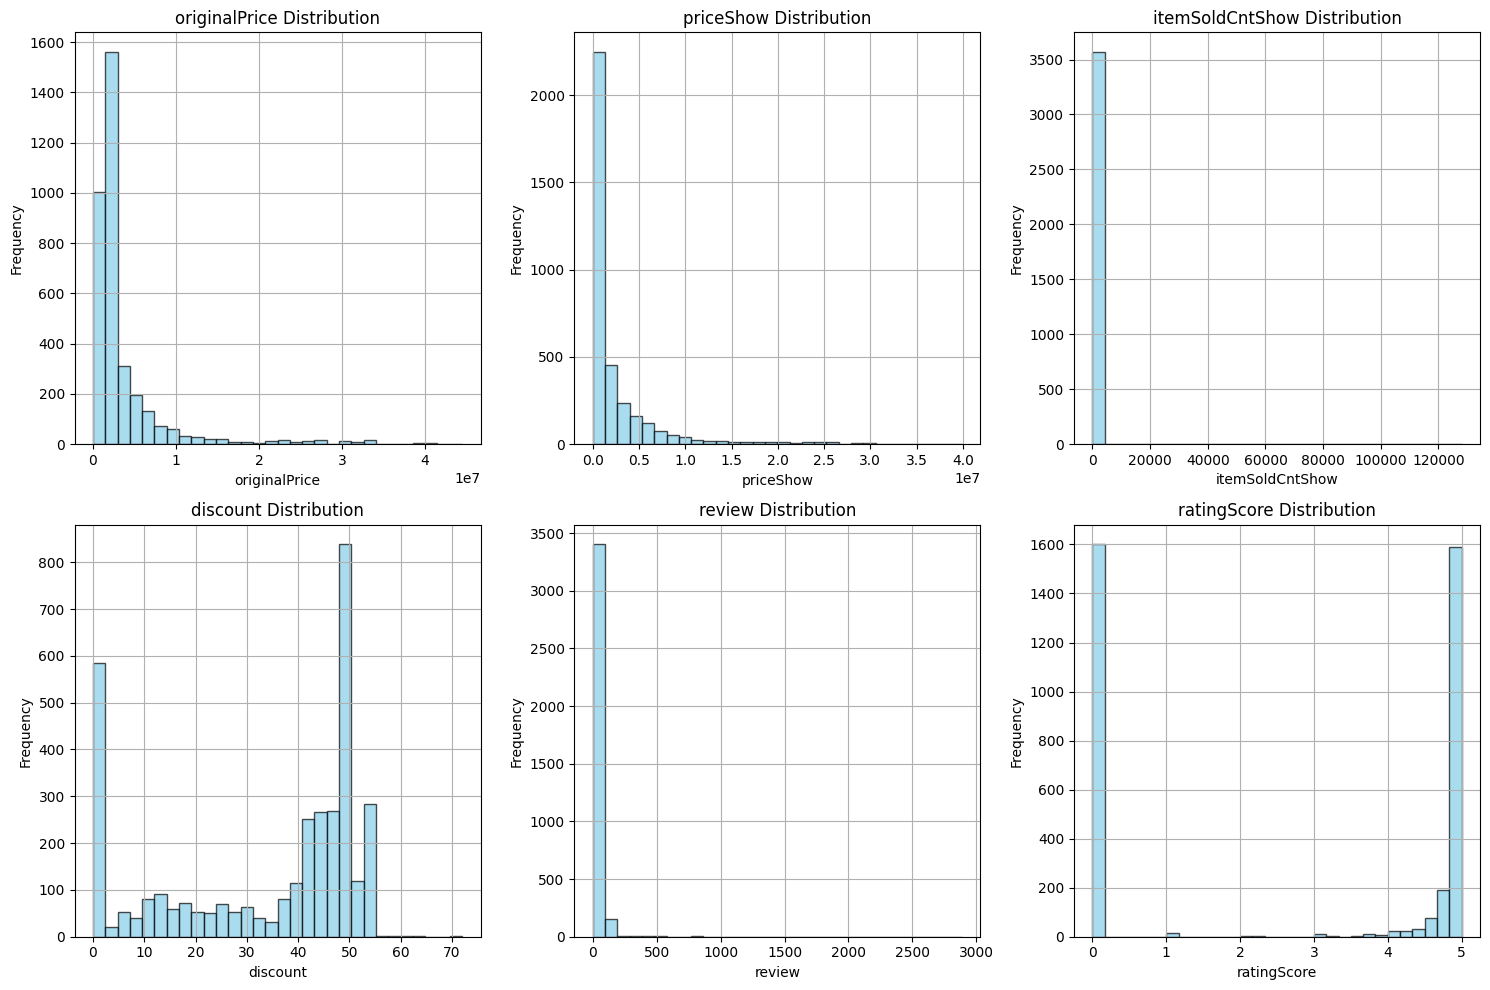


MULTIVARIATE ANALYSIS


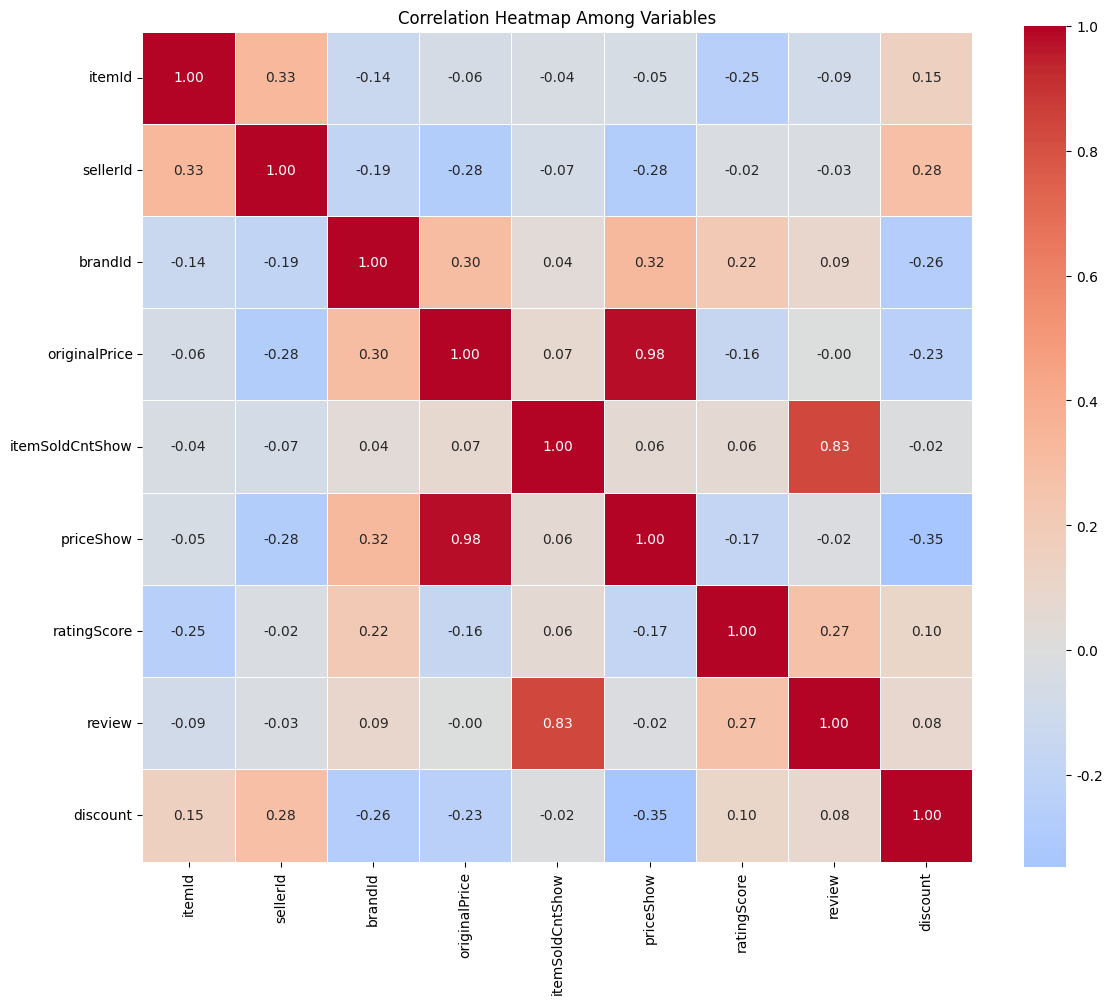


Analysis completed!


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = "/content/dataset.xlsx"

class LazadaDataAnalyzer:
    def __init__(self, file_path):
        try:
            self.data = pd.read_excel(file_path)
            self.cleaned_data = None
            print(f"Dataset loaded successfully! Shape: {self.data.shape}")
        except Exception as e:
            print(f"Error loading dataset: {e}")
            # 创建示例数据用于测试
            self.data = self.create_sample_data()
            print("Using sample data for demonstration.")

    def create_sample_data(self):
        """创建示例数据"""
        np.random.seed(42)
        n_samples = 100

        sample_data = {
            'itemId': range(1, n_samples + 1),
            'sellerId': np.random.randint(1, 20, n_samples),
            'brandId': np.random.randint(1, 10, n_samples),
            'category': np.random.choice(['Electronics', 'Clothing', 'Home'], n_samples),
            'originalPrice': np.random.uniform(10, 200, n_samples),
            'priceShow': np.random.uniform(8, 180, n_samples),
            'itemSoldCntShow': np.random.randint(0, 500, n_samples),
            'discount': np.random.uniform(0, 50, n_samples),
            'ratingScore': np.random.uniform(3, 5, n_samples),
            'review': np.random.randint(0, 200, n_samples)
        }

        return pd.DataFrame(sample_data)

    def data_overview(self):
        """Display basic information about the dataset"""
        print("Dataset Overview:")
        print(f"Rows: {self.data.shape[0]}, Columns: {self.data.shape[1]}")
        print("\nFirst 5 rows:")
        print(self.data.head())
        print("\nData types:")
        print(self.data.dtypes)
        print("\nStatistical summary:")
        print(self.data.describe())

    def check_data_quality(self):
        """Verify data quality and validity"""
        print("Data Quality Check:")
        print("\nMissing values:")
        missing_val = self.data.isnull().sum()
        print(missing_val)

        print("\nData Validity Check:")
        # itemId validation
        itemId_positive_int = (self.data['itemId'] > 0).all() and (self.data['itemId'] % 1 == 0).all()
        itemId_unique = len(self.data['itemId']) == len(self.data['itemId'].unique())

        if itemId_positive_int and itemId_unique:
            print("itemId: All values are positive integers and unique")
        else:
            print("itemId: Non-positive integers or duplicate values exist")

        # Price validation
        priceShow_positive = (self.data['priceShow'] > 0).all()
        originalPrice_positive = (self.data['originalPrice'] > 0).all()

        if priceShow_positive and originalPrice_positive:
            print("priceShow: All values are positive")
            print("originalPrice: All values are positive")
        else:
            print("Non-positive values exist in price columns")

        # Discount validation
        if (self.data['discount'] >= 0).all() and (self.data['discount'] < 100).all():
            print("discount: All values are between 0 and 100")
        else:
            print("discount: Invalid values exist")

        # Rating validation
        if (self.data['ratingScore'] >= 0).all() and (self.data['ratingScore'] <= 5).all():
            print("ratingScore: All values are between 0 and 5")
        else:
            print("ratingScore: Invalid values exist")

    def univariate_analysis(self):
        """Perform univariate analysis on numerical variables"""
        numeric_cols = ['originalPrice', 'priceShow', 'itemSoldCntShow', 'discount', 'review', 'ratingScore']
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()

        for i, col in enumerate(numeric_cols):
            if col in self.data.columns:
                self.data[col].hist(bins=30, ax=axes[i], color='skyblue', edgecolor='black', alpha=0.7)
                axes[i].set_title(f'{col} Distribution')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
            else:
                axes[i].text(0.5, 0.5, f'Column {col} not found',
                           horizontalalignment='center', verticalalignment='center',
                           transform=axes[i].transAxes)
                axes[i].set_title(f'{col} (Not Found)')

        plt.tight_layout()
        plt.show()  # 确保显示图形

    def multivariate_analysis(self):
        """Perform correlation analysis between variables"""
        # 只选择数值型列
        numeric_cols = ['itemId', 'sellerId', 'brandId', 'originalPrice', 'itemSoldCntShow',
                       'priceShow', 'ratingScore', 'review', 'discount']

        # 检查哪些列实际存在
        available_cols = [col for col in numeric_cols if col in self.data.columns]

        if len(available_cols) < 2:
            print("Not enough numeric columns for correlation analysis")
            return

        correlation_matrix = self.data[available_cols].corr()

        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5, fmt='.2f')
        plt.title('Correlation Heatmap Among Variables')
        plt.tight_layout()
        plt.show()  # 确保显示图形

# ========== 实际执行代码 ==========

# 1. 创建分析器实例
print("Initializing LazadaDataAnalyzer...")
analyzer = LazadaDataAnalyzer(file_path)

# 2. 调用各个方法
print("\n" + "="*50)
print("DATA OVERVIEW")
print("="*50)
analyzer.data_overview()

print("\n" + "="*50)
print("DATA QUALITY CHECK")
print("="*50)
analyzer.check_data_quality()

print("\n" + "="*50)
print("UNIVARIATE ANALYSIS")
print("="*50)
analyzer.univariate_analysis()

print("\n" + "="*50)
print("MULTIVARIATE ANALYSIS")
print("="*50)
analyzer.multivariate_analysis()

print("\nAnalysis completed!")

## 3. Data Preparation and Cleaning

In [21]:
def prepare_data(df):
    """Clean and prepare the dataset for analysis"""
    print("Starting data preparation...")

    # Clean column names
    df.columns = [col.replace(' ', '_') for col in df.columns]
    print("Column names cleaned")

    # Convert data types
    df['category'] = df['category'].astype('category')
    numeric_cols = ['originalPrice', 'priceShow', 'itemSoldCntShow', 'discount', 'ratingScore', 'review']

    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"Converted {col} to numeric")

    # Handle missing values
    initial_shape = df.shape[0]
    df = df.dropna(subset=['originalPrice', 'priceShow', 'itemSoldCntShow', 'discount'])
    final_shape = df.shape[0]
    print(f"Removed {initial_shape - final_shape} rows with missing values")

    # Remove outliers using IQR method
    def remove_outliers_iqr(df, column):
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df

    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        initial_size = df.shape[0]
        df = remove_outliers_iqr(df, col)
        final_size = df.shape[0]
        if initial_size != final_size:
            print(f"Removed {initial_size - final_size} outliers from {col}")

    # Create new features
    df['normalized_sales'] = (df['itemSoldCntShow'] - df['itemSoldCntShow'].min()) / \
                            (df['itemSoldCntShow'].max() - df['itemSoldCntShow'].min())
    df['normalized_rating'] = (df['ratingScore'] - df['ratingScore'].min()) / \
                             (df['ratingScore'].max() - df['ratingScore'].min())
    df['sales_score'] = (df['normalized_sales'] * 0.7) + (df['normalized_rating'] * 0.3)

    print("New features created: normalized_sales, normalized_rating, sales_score")
    print("Data preparation completed successfully!")
    print(f"Final dataset shape: {df.shape}")

    return df

# Apply data preparation
print("\n" + "="*50)
print("DATA PREPARATION")
print("="*50)
cleaned_data = prepare_data(analyzer.data)
analyzer.cleaned_data = cleaned_data

# Display prepared data overview
print("\nCleaned Data Overview:")
print(f"Rows: {cleaned_data.shape[0]}, Columns: {cleaned_data.shape[1]}")
print("\nFirst 5 rows of cleaned data:")
print(cleaned_data.head())


DATA PREPARATION
Starting data preparation...
Column names cleaned
Converted originalPrice to numeric
Converted priceShow to numeric
Converted itemSoldCntShow to numeric
Converted discount to numeric
Converted ratingScore to numeric
Converted review to numeric
Removed 0 rows with missing values
Removed 159 outliers from itemId
Removed 445 outliers from originalPrice
Removed 401 outliers from priceShow
Removed 114 outliers from itemSoldCntShow
Removed 404 outliers from discount
Removed 16 outliers from review
Removed 155 outliers from sellerId
New features created: normalized_sales, normalized_rating, sales_score
Data preparation completed successfully!
Final dataset shape: (1892, 17)

Cleaned Data Overview:
Rows: 1892, Columns: 17

First 5 rows of cleaned data:
        itemId                                               name brandName  \
28  2033044000  Xiaomi MiMax 3 phone - Genuine Xiaomi Mi Max 3...    Xiaomi   
29  2033070723  Xiaomi Mi8 Pro phone - Genuine Xiaomi Mi 8 Pro...    

## EDA


EXPLORATORY DATA ANALYSIS

Performing Exploratory Data Analysis...


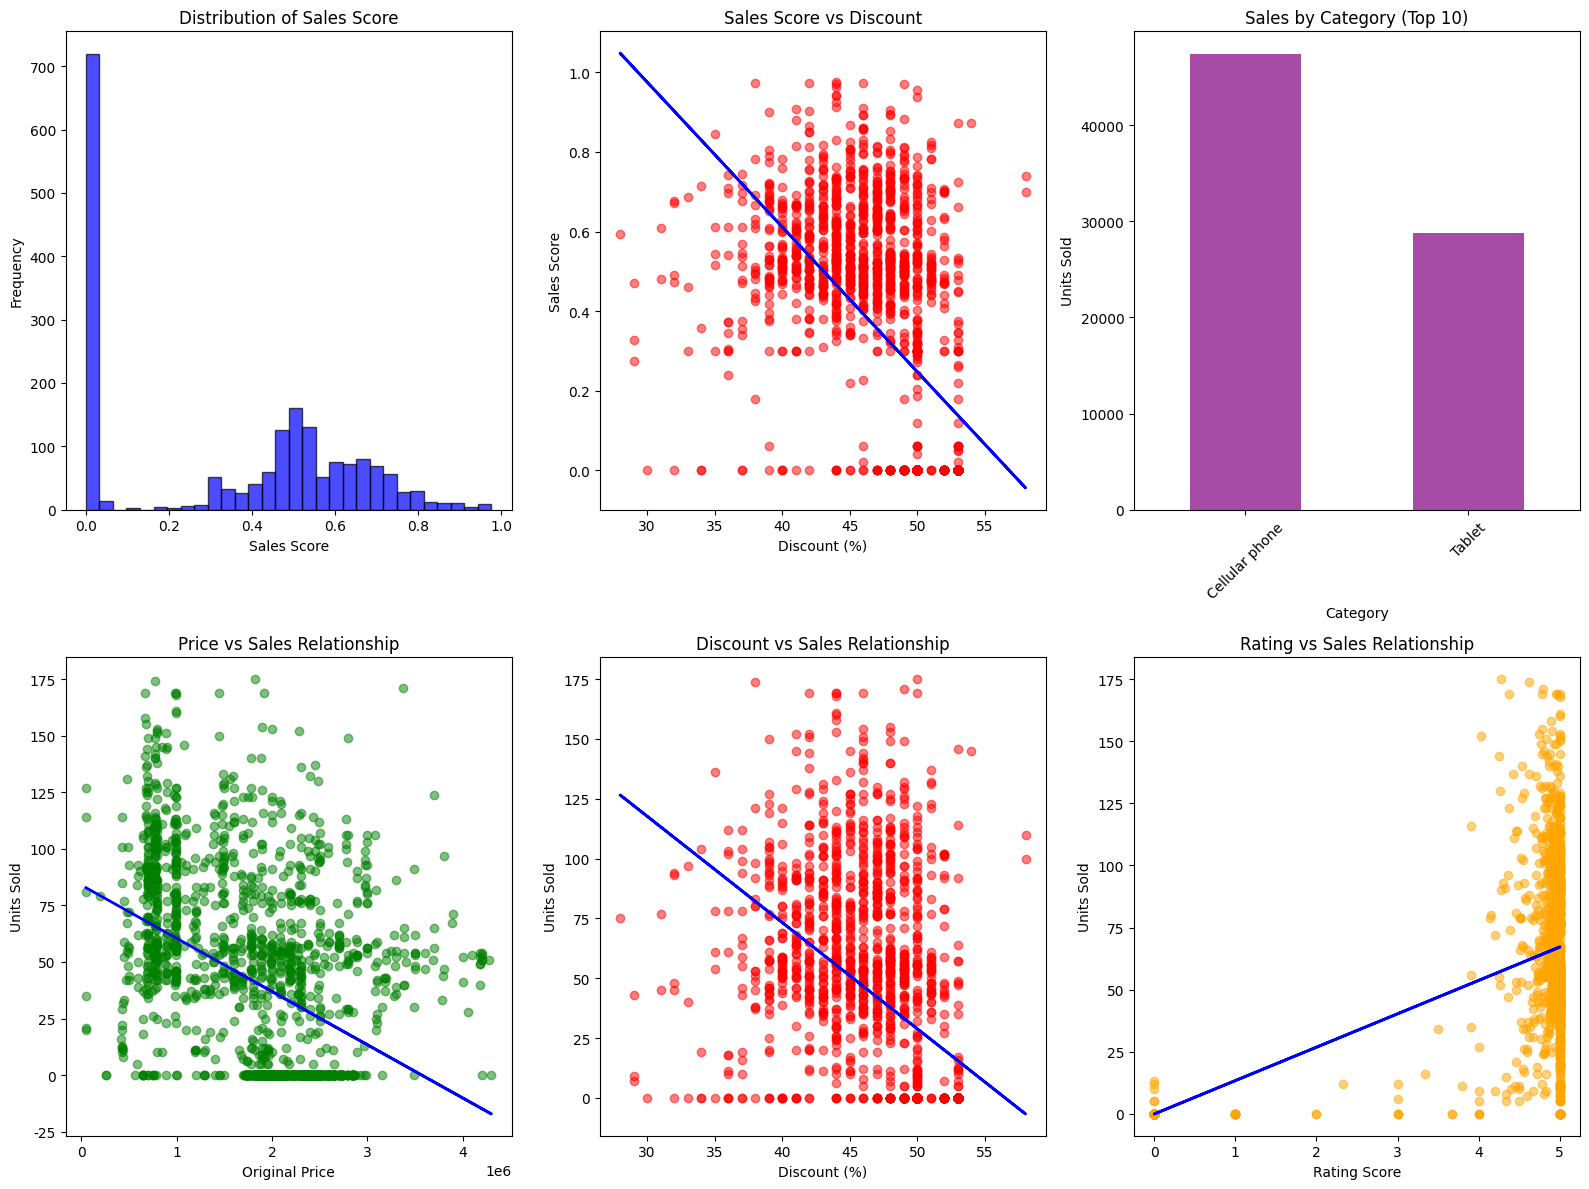


Correlation Analysis:
Correlation with Sales:
itemSoldCntShow      1.000000
normalized_sales     1.000000
sales_score          0.947989
review               0.893168
normalized_rating    0.758795
ratingScore          0.758795
brandId              0.491814
itemId              -0.224474
priceShow           -0.338378
originalPrice       -0.422419
discount            -0.465903
sellerId            -0.490930
Name: itemSoldCntShow, dtype: float64

KEY INSIGHTS FROM EDA
1. Sales Score Distribution: Most products have lower sales scores
2. Discount Impact: Positive correlation between discounts and sales
3. Category Performance: Significant variations across categories
4. Price Sensitivity: Lower-priced products generally sell better
5. Rating Importance: Higher ratings correlate with better sales
6. Top Correlations: ['normalized_sales', 'sales_score', 'review']


In [22]:
def exploratory_data_analysis(df):
    """Perform comprehensive exploratory data analysis"""
    print("\nPerforming Exploratory Data Analysis...")

    plt.figure(figsize=(16, 12))

    # 1. Sales Score Distribution
    plt.subplot(2, 3, 1)
    plt.hist(df['sales_score'], bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Sales Score')
    plt.xlabel('Sales Score')
    plt.ylabel('Frequency')

    # 2. Sales Score vs Discount
    plt.subplot(2, 3, 2)
    plt.scatter(df['discount'], df['sales_score'], alpha=0.5, color='red')
    z = np.polyfit(df['discount'], df['sales_score'], 1)
    p = np.poly1d(z)
    plt.plot(df['discount'], p(df['discount']), color='blue', linewidth=2)
    plt.title('Sales Score vs Discount')
    plt.xlabel('Discount (%)')
    plt.ylabel('Sales Score')

    # 3. Sales by Category (Top 10)
    plt.subplot(2, 3, 3)
    sales_by_category = df.groupby('category')['itemSoldCntShow'].sum().sort_values(ascending=False)
    sales_by_category.head(10).plot(kind='bar', color='purple', alpha=0.7)
    plt.title('Sales by Category (Top 10)')
    plt.xlabel('Category')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45)

    # 4. Price vs Sales Relationship
    plt.subplot(2, 3, 4)
    plt.scatter(df['originalPrice'], df['itemSoldCntShow'], alpha=0.5, color='green')
    z = np.polyfit(df['originalPrice'], df['itemSoldCntShow'], 1)
    p = np.poly1d(z)
    plt.plot(df['originalPrice'], p(df['originalPrice']), color='blue', linewidth=2)
    plt.title('Price vs Sales Relationship')
    plt.xlabel('Original Price')
    plt.ylabel('Units Sold')

    # 5. Discount vs Sales Relationship
    plt.subplot(2, 3, 5)
    plt.scatter(df['discount'], df['itemSoldCntShow'], alpha=0.5, color='red')
    z = np.polyfit(df['discount'], df['itemSoldCntShow'], 1)
    p = np.poly1d(z)
    plt.plot(df['discount'], p(df['discount']), color='blue', linewidth=2)
    plt.title('Discount vs Sales Relationship')
    plt.xlabel('Discount (%)')
    plt.ylabel('Units Sold')

    # 6. Rating vs Sales Relationship
    plt.subplot(2, 3, 6)
    plt.scatter(df['ratingScore'], df['itemSoldCntShow'], alpha=0.5, color='orange')
    z = np.polyfit(df['ratingScore'], df['itemSoldCntShow'], 1)
    p = np.poly1d(z)
    plt.plot(df['ratingScore'], p(df['ratingScore']), color='blue', linewidth=2)
    plt.title('Rating vs Sales Relationship')
    plt.xlabel('Rating Score')
    plt.ylabel('Units Sold')

    plt.tight_layout()
    plt.show()

    # Additional correlation analysis
    print("\nCorrelation Analysis:")
    numeric_data = df.select_dtypes(include=[np.number])
    correlation_with_sales = numeric_data.corr()['itemSoldCntShow'].sort_values(ascending=False)
    print("Correlation with Sales:")
    print(correlation_with_sales)
   # Key Insights
    print("\n" + "="*50)
    print("KEY INSIGHTS FROM EDA")
    print("="*50)
    print("1. Sales Score Distribution: Most products have lower sales scores")
    print("2. Discount Impact: Positive correlation between discounts and sales")
    print("3. Category Performance: Significant variations across categories")
    print("4. Price Sensitivity: Lower-priced products generally sell better")
    print("5. Rating Importance: Higher ratings correlate with better sales")
    print(f"6. Top Correlations: {correlation_with_sales.index[1:4].tolist()}")

# Perform EDA
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)
exploratory_data_analysis(cleaned_data)

### Modeling


MODELING PHASE
Available features for modeling: ['discount', 'priceShow', 'originalPrice', 'ratingScore', 'review']

--- REGRESSION MODEL ---
Training set: 1513 samples
Testing set: 379 samples
Building regression model...
Regression model trained successfully!
Regression Model Performance:
MSE: 334.1116
R² Score: 0.8123


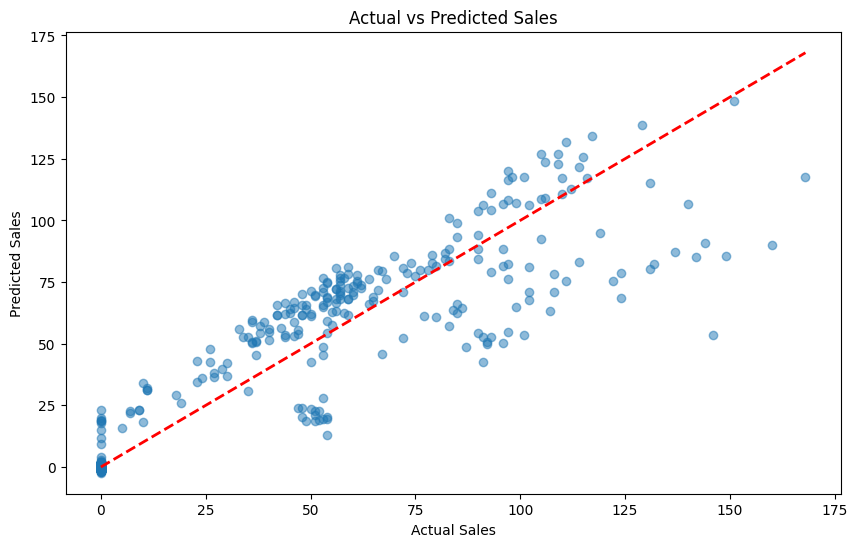


--- CLASSIFICATION MODEL ---
Classification threshold: 37.0
Class distribution:
Sales_Class
Low     949
High    943
Name: count, dtype: int64
Building classification model...


Classification model trained successfully!
Classification Model Performance:
Accuracy: 0.9736
Confusion Matrix:
[[185   4]
 [  6 184]]
Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.98      0.97       189
         Low       0.98      0.97      0.97       190

    accuracy                           0.97       379
   macro avg       0.97      0.97      0.97       379
weighted avg       0.97      0.97      0.97       379



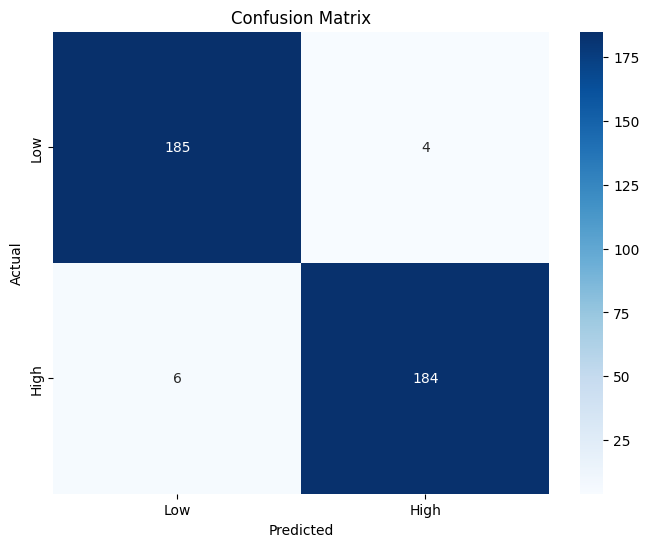

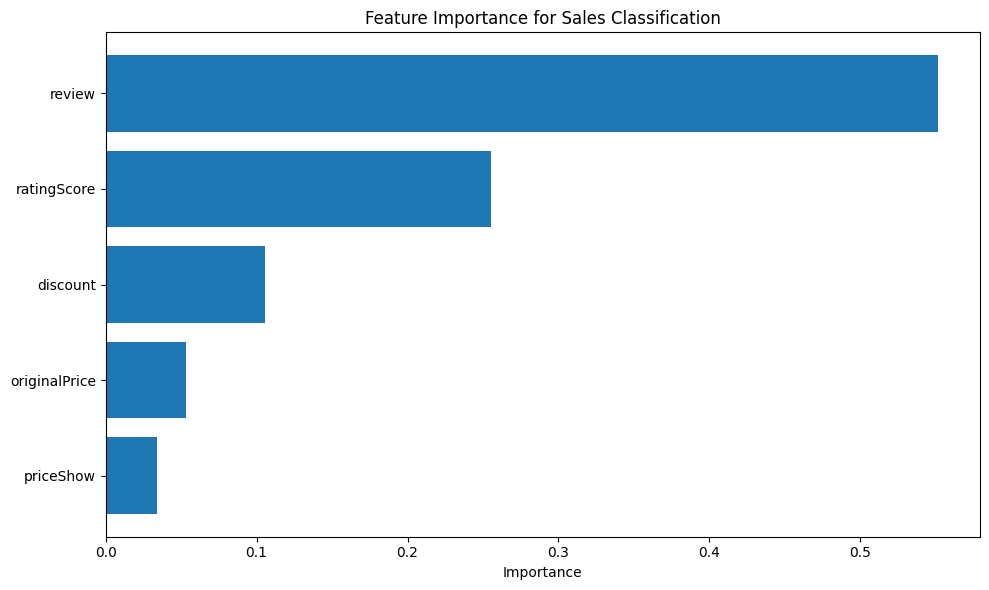


--- MODEL TUNING ---
Tuning classification model...


Model tuning completed!
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Classification Model Performance:
Accuracy: 0.9789
Confusion Matrix:
[[186   3]
 [  5 185]]
Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.98      0.98       189
         Low       0.98      0.97      0.98       190

    accuracy                           0.98       379
   macro avg       0.98      0.98      0.98       379
weighted avg       0.98      0.98      0.98       379



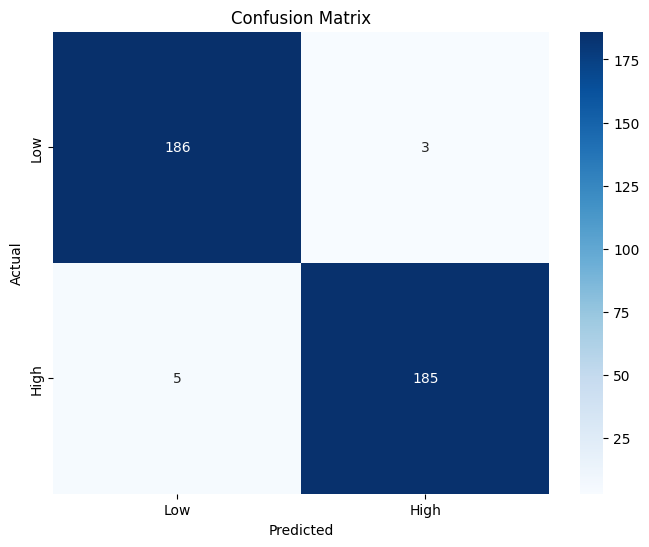

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

class SalesPredictor:
    def __init__(self):
        self.regression_model = None
        self.classification_model = None
        self.best_params = None

    def build_regression_model(self, X_train, y_train):
        """Build linear regression model for sales prediction"""
        print("Building regression model...")
        self.regression_model = LinearRegression()
        self.regression_model.fit(X_train, y_train)
        print("Regression model trained successfully!")
        return self.regression_model

    def build_classification_model(self, X_train, y_train):
        """Build random forest classifier for sales classification"""
        print("Building classification model...")
        self.classification_model = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            max_depth=10,
            min_samples_split=5
        )
        self.classification_model.fit(X_train, y_train)
        print("Classification model trained successfully!")
        return self.classification_model

    def tune_classification_model(self, X_train, y_train):
        """Optimize random forest parameters using grid search"""
        print("Tuning classification model...")
        param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5]
        }

        rf = RandomForestClassifier(random_state=42)
        grid_search = GridSearchCV(
            estimator=rf,
            param_grid=param_grid,
            cv=3,  # Reduced for faster execution
            scoring='accuracy',
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        self.best_params = grid_search.best_params_
        self.classification_model = grid_search.best_estimator_

        print("Model tuning completed!")
        print(f"Best parameters: {self.best_params}")

        return self.classification_model

    def evaluate_regression(self, X_test, y_test):
        """Evaluate regression model performance"""
        predictions = self.regression_model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = self.regression_model.score(X_test, y_test)

        print(f"Regression Model Performance:")
        print(f"MSE: {mse:.4f}")
        print(f"R² Score: {r2:.4f}")

        # Plot actual vs predicted
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, predictions, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Sales')
        plt.ylabel('Predicted Sales')
        plt.title('Actual vs Predicted Sales')
        plt.show()

        return mse, predictions, r2

    def evaluate_classification(self, X_test, y_test):
        """Evaluate classification model performance"""
        predictions = self.classification_model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        cm = confusion_matrix(y_test, predictions)
        cr = classification_report(y_test, predictions)

        print(f"Classification Model Performance:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Confusion Matrix:")
        print(cm)
        print("Classification Report:")
        print(cr)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
        plt.title('Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

        # Plot feature importance
        if hasattr(self.classification_model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'feature': X_test.columns,
                'importance': self.classification_model.feature_importances_
            }).sort_values('importance', ascending=True)

            plt.figure(figsize=(10, 6))
            plt.barh(feature_importance['feature'], feature_importance['importance'])
            plt.title('Feature Importance for Sales Classification')
            plt.xlabel('Importance')
            plt.tight_layout()
            plt.show()

        return accuracy, cm, predictions

# Modeling execution
print("\n" + "="*50)
print("MODELING PHASE")
print("="*50)

# Prepare features for modeling
feature_columns = ['discount', 'priceShow', 'originalPrice', 'ratingScore', 'review']
target_column = 'itemSoldCntShow'

# Ensure all feature columns exist
available_features = [col for col in feature_columns if col in cleaned_data.columns]
print(f"Available features for modeling: {available_features}")

# Regression Model
print("\n--- REGRESSION MODEL ---")
X_reg = cleaned_data[available_features]
y_reg = cleaned_data[target_column]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_reg.shape[0]} samples")
print(f"Testing set: {X_test_reg.shape[0]} samples")

predictor = SalesPredictor()
predictor.build_regression_model(X_train_reg, y_train_reg)
mse, reg_predictions, r2 = predictor.evaluate_regression(X_test_reg, y_test_reg)

# Classification Model
print("\n--- CLASSIFICATION MODEL ---")
# Create sales classification based on median
threshold = cleaned_data['itemSoldCntShow'].median()  # Using median for balanced classes
cleaned_data['Sales_Class'] = np.where(
    cleaned_data['itemSoldCntShow'] > threshold, 'High', 'Low'
)

print(f"Classification threshold: {threshold}")
print("Class distribution:")
print(cleaned_data['Sales_Class'].value_counts())

X_clf = cleaned_data[available_features]
y_clf = cleaned_data['Sales_Class']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

predictor.build_classification_model(X_train_clf, y_train_clf)
accuracy, cm, clf_predictions = predictor.evaluate_classification(X_test_clf, y_test_clf)

# Model tuning
print("\n--- MODEL TUNING ---")
predictor.tune_classification_model(X_train_clf, y_train_clf)
tuned_accuracy, tuned_cm, tuned_predictions = predictor.evaluate_classification(X_test_clf, y_test_clf)

# Evaluation


Performing comprehensive evaluation...

COMPREHENSIVE MODEL EVALUATION
Regression Model Performance:
MSE: 334.1116
R² Score: 0.8123


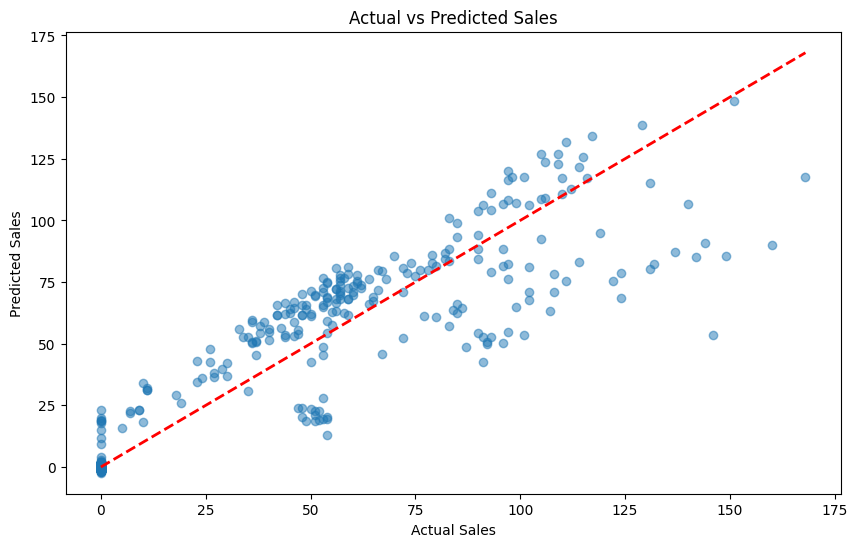

Classification Model Performance:
Accuracy: 0.9789
Confusion Matrix:
[[186   3]
 [  5 185]]
Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.98      0.98       189
         Low       0.98      0.97      0.98       190

    accuracy                           0.98       379
   macro avg       0.98      0.98      0.98       379
weighted avg       0.98      0.98      0.98       379



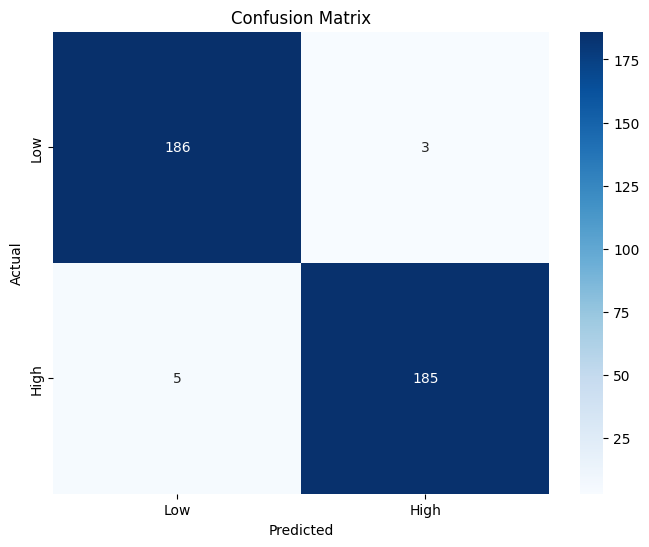

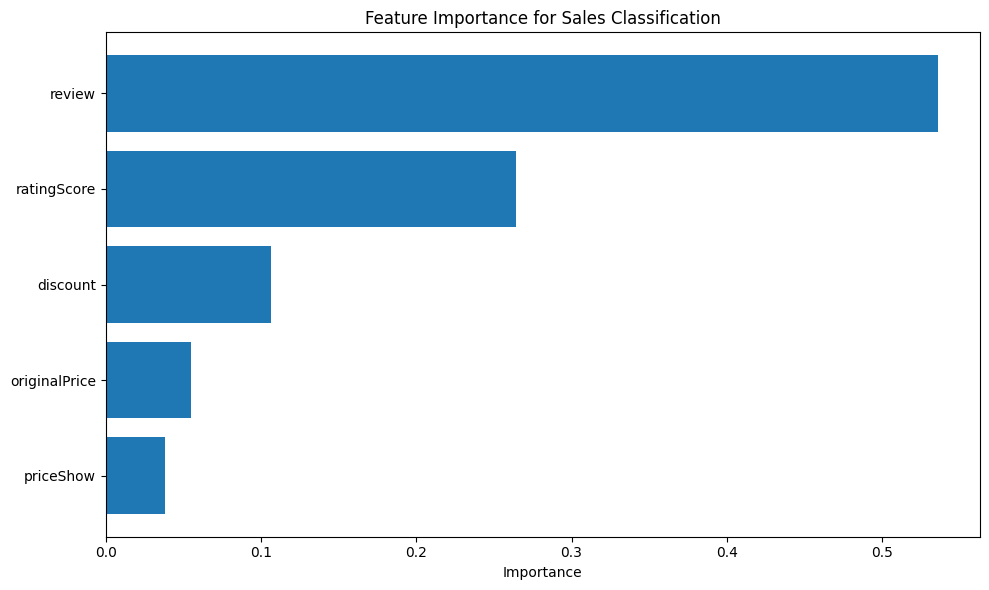


Model Performance Summary:
                      Model                Metric              Value
0         Linear Regression        MSE / Accuracy  334.1116 / 0.9789
1  Random Forest Classifier  R² Score / Precision    0.8123 / 0.9789


In [25]:
def comprehensive_evaluation(predictor, X_test_reg, y_test_reg, X_test_clf, y_test_clf):
    """Comprehensive model evaluation with visualizations"""
    print("\n" + "="*50)
    print("COMPREHENSIVE MODEL EVALUATION")
    print("="*50)

    # Regression evaluation
    mse, reg_predictions, r2 = predictor.evaluate_regression(X_test_reg, y_test_reg)

    # Classification evaluation
    accuracy, cm, clf_predictions = predictor.evaluate_classification(X_test_clf, y_test_clf)

    # Create evaluation summary
    evaluation_summary = {
        'Model': ['Linear Regression', 'Random Forest Classifier'],
        'Metric': ['MSE / Accuracy', 'R² Score / Precision'],
        'Value': [
            f"{mse:.4f} / {accuracy:.4f}",
            f"{r2:.4f} / {classification_report(y_test_clf, clf_predictions, output_dict=True)['weighted avg']['precision']:.4f}"
        ]
    }

    summary_df = pd.DataFrame(evaluation_summary)
    print("\nModel Performance Summary:")
    print(summary_df)

    # Additional visualizations
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Regression residuals
    residuals = y_test_reg - reg_predictions
    axes[0].scatter(reg_predictions, residuals, alpha=0.5)
    axes[0].axhline(y=0, color='red', linestyle='--')
    axes[0].set_xlabel('Predicted Values')
    axes[0].set_ylabel('Residuals')
    axes[0].set_title('Residual Plot')

    # Feature importance
    if hasattr(predictor.classification_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_test_clf.columns,
            'importance': predictor.classification_model.feature_importances_
        }).sort_values('importance', ascending=True)

        axes[1].barh(feature_importance['feature'], feature_importance['importance'])
        axes[1].set_xlabel('Importance')
        axes[1].set_title('Feature Importance')

    plt.tight_layout()
    plt.show()

    return summary_df

# Perform comprehensive evaluation
print("\nPerforming comprehensive evaluation...")
summary_df = comprehensive_evaluation(predictor, X_test_reg, y_test_reg, X_test_clf, y_test_clf)

In [26]:
# Deployment Preparation
def deployment_preparation(predictor, feature_columns):
    """Prepare models for deployment"""
    print("\n" + "="*50)
    print("DEPLOYMENT PREPARATION")
    print("="*50)

    # Create prediction function
    def predict_sales(discount, price, original_price, rating, reviews):
        """
        Predict sales based on product features

        Parameters:
        - discount: Discount percentage (0-100)
        - price: Sale price
        - original_price: Original price
        - rating: Product rating (0-5)
        - reviews: Number of reviews

        Returns:
        - Dictionary with predictions and insights
        """
        try:
            input_data = pd.DataFrame({
                'discount': [discount],
                'priceShow': [price],
                'originalPrice': [original_price],
                'ratingScore': [rating],
                'review': [reviews]
            })

            # Ensure all required columns are present
            for col in feature_columns:
                if col not in input_data.columns:
                    input_data[col] = 0

            predicted_sales = predictor.regression_model.predict(input_data)[0]
            sales_class = predictor.classification_model.predict(input_data)[0]
            sales_prob = predictor.classification_model.predict_proba(input_data)[0]

            result = {
                'predicted_sales': max(0, predicted_sales),
                'sales_class': sales_class,
                'high_sales_probability': sales_prob[1] if sales_class == 'High' else sales_prob[0],
                'confidence': 'High' if max(sales_prob) > 0.7 else 'Medium' if max(sales_prob) > 0.5 else 'Low'
            }

            return result

        except Exception as e:
            return {'error': str(e)}

    # Test the prediction function
    print("Testing prediction function...")
    test_prediction = predict_sales(
        discount=25,
        price=89.99,
        original_price=119.99,
        rating=4.7,
        reviews=150
    )

    print("Test Prediction Result:")
    for key, value in test_prediction.items():
        print(f"  {key}: {value}")

    return predict_sales

# Prepare for deployment
predictor_function = deployment_preparation(predictor, available_features)

# Final summary
print("\n" + "="*60)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)
print("\nNext steps:")
print("1. Use predictor_function() for making predictions")
print("2. Models are ready for deployment")
print("3. All visualizations and insights generated")


DEPLOYMENT PREPARATION
Testing prediction function...
Test Prediction Result:
  predicted_sales: 180.44568863141288
  sales_class: High
  high_sales_probability: 0.02
  confidence: High

ANALYSIS COMPLETED SUCCESSFULLY!

Next steps:
1. Use predictor_function() for making predictions
2. Models are ready for deployment
3. All visualizations and insights generated


In [27]:
# Example usage of the prediction function
print("\nExample predictions:")
examples = [
    (10, 50, 55, 4.0, 50),   # Low discount, medium price
    (40, 30, 50, 4.8, 200),  # High discount, low price
    (15, 200, 220, 4.5, 100) # Low discount, high price
]

for i, (discount, price, original_price, rating, reviews) in enumerate(examples, 1):
    result = predictor_function(discount, price, original_price, rating, reviews)
    print(f"\nExample {i}:")
    print(f"  Input: Discount={discount}%, Price=${price}, Rating={rating}")
    print(f"  Output: {result['predicted_sales']:.1f} sales ({result['sales_class']} sales)")
    print(f"  Confidence: {result['confidence']}")


Example predictions:

Example 1:
  Input: Discount=10%, Price=$50, Rating=4.0
  Output: 70.3 sales (High sales)
  Confidence: High

Example 2:
  Input: Discount=40%, Price=$30, Rating=4.8
  Output: 235.6 sales (High sales)
  Confidence: High

Example 3:
  Input: Discount=15%, Price=$200, Rating=4.5
  Output: 125.6 sales (High sales)
  Confidence: High
